# Diabetic Retinopathy Detection

This Jupyter Notebook uses neural networks to TBD.

<!--

## Approach
* Evaluations of classification performed were performed using 2 sample datasets:
    * sklearn's Iris sample dataset, consisting of 150 sample data points for 3 varieties of iris flowers
    * voice dataset, containing 3168 sample data points of male and female speakers

* Hyper-parameter tuning was performed using a GridSearch estimator for each classification model:
    
* Parameters providing the best scores and associated scores were plotted
    
## Results
* Refer to the Figures and Table of results provided below
* Hyperparameter tuning provided by sklearn GridSearchCV provided a convenient method of evaluating many classification model parameter sets in an efficient way.  The blue dots represent the optimal parameter sets selected for each Dataset/Classification Model, and the grey dots represent suboptimal parameter sets.
* For the Iris dataset, the Support Vector Machine SVC model provided the  combination of best score of 0.964 and Mean Fit Time of 0.200 ms, with Random Forest and Decision Tree classifiers providing close performance.
* For the Voice dataset, the SVC classifer also had the hightest Best Score at 0.980, which was slightly above the performance of the Random Forest classifier.  With SVC, the fit time was singificantly higher for the Voice dataset (40.6 ms) than for the Iris dataset (0.2 ms), which is expected given the larger number of features associated with the Voice dataset (20) vs. the Iris dataset (4)
* It's interesting to note that the K-Nearest Neighbors classifier, while performing lower amongst these models, operated with fast Mean Fit Time (3.2 ms) for Voice, which might make using KNN a good choice vs. other more calculation-intensive options in cases where lower fit time is more important than optimum accuracy.

-->

TBD

<!--

| Figure: Neural Network Performance: Best Score vs. Mean Fit Time (ms) | 
| :----------: |
| ![Figure: Neural Network Performance: Best Score vs. Mean Fit Time (ms) is Loading...](docs/Figure-Neural_Network_Performance-A.png "Figure: Neural Network Performance: Best Score vs. Mean Fit Time (ms)") |


| Figure: Tuned Classifier Performance: Best Score vs. F1 Score - All Datasets/Classifiers | Figure: Tuned Classifier Performance: Precision vs. Recall - All Datasets/Classifiers |
| :----------: | :----------: |
| ![Figure: Tuned Classifier Performance: Best Score vs. F1 Score - All Datasets/Classifiers is Loading...](docs/Figure-Hyper_Parameter_Tuning-BestScore_vs_F1-Combined.png "Figure: uned Classifier Performance: Best Score vs. F1 Score - All Datasets/Classifiers") | ![Figure: Tuned Classifier Performance: Precision vs. Recall - All Datasets/Classifiers is Loading...](docs/Figure-Hyper_Parameter_Tuning-Precision_vs_Recall-Combined.png "Figure: Tuned Classifier Performance: Precision vs. Recall - All Datasets/Classifiers") |

| Figure: Tuned Classifier Performance - Subplots |
| :----------: |
| ![Figure: Tuned Classifier Performance - Subplots is Loading...](docs/Figure-Hyper_Parameter_Tuning-Subplots.png "Figure: Tuned Classifier Performance - Subplots") |

| Table: Tuned Classifier Performance |
| :----------: |
| ![Table: Tuned Classifier Performance is Loading...](docs/Table-Hyper_Parameter_Tuning.png "Table: Tuned Classifier Performance") |

-->

# Dependencies

In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd
from pandas.plotting import table
import math
import random
import shutil
import os

# from imutils import paths
# import argparse
# import pickle
# import cv2

from pprint import pprint

# Visualization
import graphviz
import pydotplus
from IPython.display import Image

# Machine Learning - Data Preparation and Pre-Processing
from sklearn.model_selection import train_test_split # Split data into training and testing samples
from sklearn.model_selection import cross_val_score  # Score a model using k-fold or other cross validation

from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# Machine Learning - Sci-Kit Learn - Models - Regression
from sklearn.linear_model import LinearRegression  # TBD
from sklearn.linear_model import Lasso             # TBD
from sklearn.linear_model import Ridge             # TBD
from sklearn.linear_model import ElasticNet        # TBD

# Machine Learning - Sci-Kit Learn - Models - Classification
from sklearn.linear_model import LogisticRegression   # Logistic Regression Classifier
from sklearn import tree                              # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier   # Random Forest Classifier
from sklearn import svm                               # Support Vector Machine Classifier
from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors (KNN)

# Machine Learning - GridSearch for Hyper-Parameter tuning
from sklearn.model_selection import GridSearchCV      # Grid Search

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error    # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score              # R-squared (Coefficient of Determination) metric
from sklearn.metrics import confusion_matrix      # Generate a confusion matrix (actual vs. predicted counts)
from sklearn.metrics import classification_report # Calculate metrics for prediction performance
from sklearn.metrics import precision_score       # Calculate the precision: Tp / (Tp + Fp) => Ability to avoid false negatives
from sklearn.metrics import recall_score          # Calculate the recall: Tp / (Tp + Fn) => Ability to find all positive samples
from sklearn.metrics import f1_score              # Calculate the F1 score: 2*(precision*recall)/(precision+recall)

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification
from sklearn.datasets import load_iris           # Sample multi-class dataset for classification
from sklearn.datasets import make_classification # Generate datasets for classification

# Machine Learning - Keras (Tensorflow) - Models
from keras.models import Sequential               # Sequential model serving as foundation for neural network
# from keras.layers import Dense                    # Nodes for specifying input, hidden, and output layers
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense

# Machine Learning - Keras (Tensorflow) - Convolutional Neural Networks (Image Classification)
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

# Machine Learning - Keras (Tensorflow) - Optimizers
from keras.optimizers import SGD
from keras.optimizers import Adam

# Machine Learning - Keras (Tensorflow) - Encoding
from keras.utils import to_categorical            # One-Hot Encoder provided through Keras

# Machine Learning - Keras (Tensorflow) - Other related Tools
from keras.utils import plot_model                # Plot a neural network model
from keras.models import load_model               # Load a saved machine learning model
from keras.preprocessing import image             # Loads an image for application of machine learning
from keras.preprocessing.image import img_to_array # Converts an image to a numpy array
from keras.preprocessing.image import ImageDataGenerator

# Machine Learning - Keras (Tensorflow) -  Dataset Generation
from keras.datasets import mnist                  # Images: Handwritten digits 0-9 (28x28 grayscale, 60K train, 10K test)


Using TensorFlow backend.


# Data Exploration

### Import a sample Training Image

In [2]:
# File path and name of the image to be processed
train_image_file = "data/000c1434d8d7.png"

In [3]:
# Import the image - known to be a PNG format file (28px height by 28px width, grayscale w/ 24 bit depth)
# image_size = (3216, 2136)
# test_image = image.load_img(test_image_file, target_size=image_size, grayscale=True)

# Lod the train image file as a Python Image Library (PIL) image object
# train_image = image.load_img(train_image_file, target_size=(170, 256), color_mode='grayscale', interpolation='lanczos')
train_image = image.load_img(train_image_file, color_mode='grayscale')

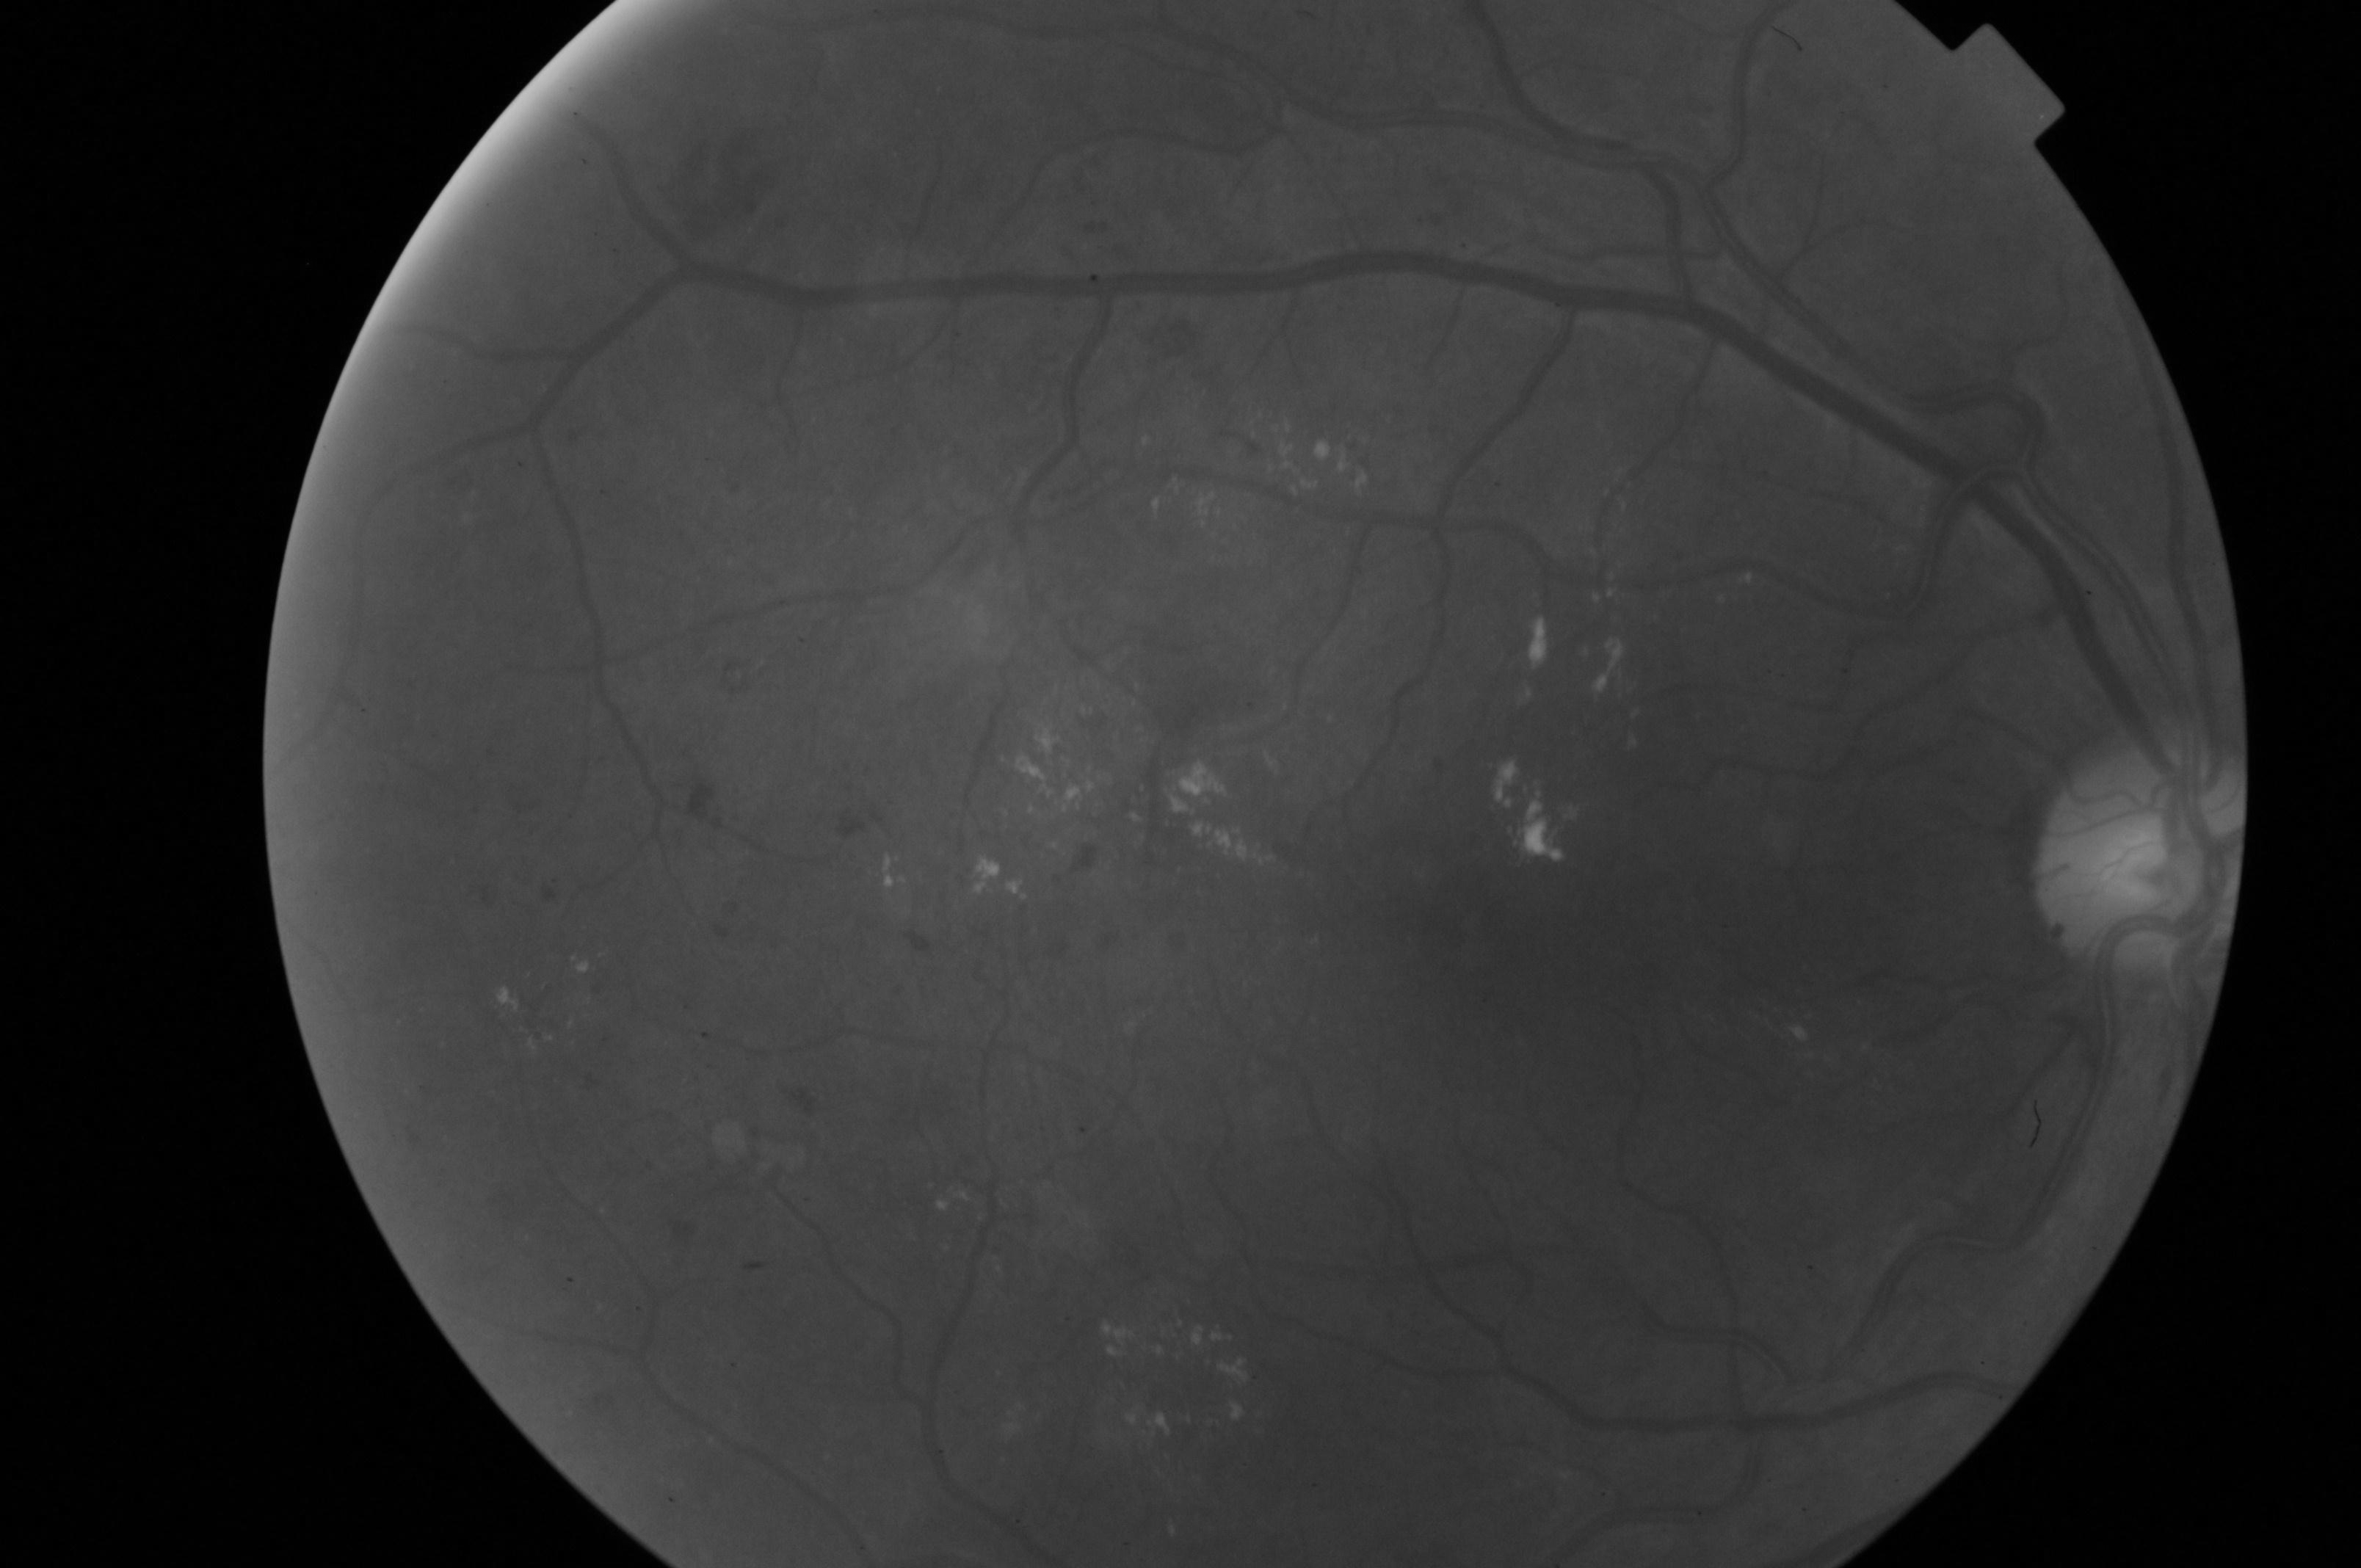

In [4]:
# Display the image
# train_image.show()    # Displays the image in the external Windows Photos application
train_image             # Displays the image in this Jupyter Notebook cell
# train_image.thumbnail(size=(256,170))

In [5]:
# Display attributes of the image
print(type(train_image))
print(train_image.format)
print(train_image.mode)
print(train_image.size)

<class 'PIL.Image.Image'>
None
L
(3216, 2136)


In [6]:
# convert to numpy array
train_image_array = img_to_array(train_image)
print(train_image_array.dtype)
# Display the array shape: (Height, Width, Channels)
print(train_image_array.shape)

float32
(2136, 3216, 1)


In [7]:
train_image_array[200][200]

array([1.], dtype=float32)

In [8]:
# Save the image
train_image_gs_file = "data/000c1434d8d7-gs.png"
image.save_img(train_image_gs_file, train_image_array)

In [9]:
# Reload the image, just for fun
gs_train_image = image.load_img(train_image_gs_file)
print(type(train_image))
print(train_image.format)
print(train_image.mode)
print(train_image.size)

<class 'PIL.Image.Image'>
None
L
(3216, 2136)


## Locate the Training and Testing Data

In [10]:
# Data folders/subfolders

# data/train_images - Source of training images in a single folder
dir_src_train = "./data/train_images/"

# data/train - Split of data from dir_src_train for training, segmented in subfolders by label
dir_train = "./data/train/"

# data/valid - Split of data from dir_src_train for validation, segmented in subfolders by label
dir_valid = "./data/valid/"

# data/test - Split of data from dir_src_train for testing, consolidated under a single subfolder "test_subfolder"
dir_test = "./data/test/"

In [11]:
# List of all training images, with labels
labels_train_file = "data/train.csv"

In [12]:
# Load into a dataframe
all_train_labels_df = pd.read_csv(labels_train_file)

# Limit subsequent pre-processing to only 15 images initially
all_train_labels_df = all_train_labels_df[0:100]
all_train_labels_df

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
95,07929d32b5b3,1
96,07a0be6b347f,0
97,07a0e34c8d20,3
98,07a1c7073982,1


In [13]:
# Look for any entries where the labels are not a number
invalid_list = all_train_labels_df['diagnosis'].map(math.isnan)
if sum(invalid_list) > 0:
    print(f"WARNING: Dropping {sum(invalid_list)} rows with labels having value NaN")
    print(all_train_labels_df[ invalid_list ])

    # Drop rows with invalid labels
    all_train_labels_df = all_train_labels_df[ invalid_list == False ].reset_index(drop=True)
    all_train_labels_df

## Split the Training Data into Training, Validation, and Test Subsets

In [14]:
# Perform test_train_split twice to create training (60%), validation (20%), and testing (20%) subsets
X_train, X_remain, y_train, y_remain = train_test_split(
                        all_train_labels_df['id_code'],
                        all_train_labels_df['diagnosis'],
                        test_size = 0.4,
                        random_state=1
                        )

X_valid, X_test, y_valid, y_test = train_test_split(
                        X_remain,
                        y_remain,
                        test_size = 0.5,
                        random_state=1
                        )

print( X_train.shape, y_train.shape )
print( X_valid.shape, y_valid.shape )
print( X_test.shape, y_test.shape )

(60,) (60,)
(20,) (20,)
(20,) (20,)


## Function to Copy Images to Proper Training, Validation, and Testing Subfolders

In [15]:
# Function to copy the training, validation, or testing data
# from the source training image folder to the appopriate destination folder
def copy_images_to_folders( a_X = None, a_y = None, a_dest_type = None):
    # a_X: Image id code, used to identify the file name of each image
    # a_y: Label associated with each image
    # a_dest_type:
    #   'train': Each image will be copied to a training subfolder, under a subfolder based upon it's label
    #   'valid': Each image will be copied to a validation subfolder, under a subfolder based upon it's label
    #   'test': Each image will be copied to a testing subfolder, under a common subfolder "test_subfolder"
    #
    # IMPT: Depends upon dir_train, dir_valid, dir_test,
    #       which must be set externally before this function is called
    
    # Basic argument checking
    if (a_X is None) or (a_y is None) or (a_dest_type is None):
        print(f"Error: Mandatory argument is missing - X: '{a_X}', y: '{a_y}', Destination Flag: '{a_dest_type}'")
        return False
        
    # Dictionary to mapping of flag values to destination main folder
    dest_folder_map = {
        'train': dir_train,
        'valid': dir_valid,
        'test': dir_test
    }
    
    # Check to ensure the destination flag is valid
    if a_dest_type not in dest_folder_map.keys():
        print(f"Error: Invalid destination flag - Destination Flag: '{a_dest_type}' must be 'train', 'valid', or 'test'")
        return False
            
    # Create the destination folder if it doesn't already exist
    if not os.path.exists(dest_folder_map[a_dest_type]):
            os.mkdir(dest_folder_map[a_dest_type])

    # Loop through each of the images in the dataframe
    for X_val, y_val in zip(a_X, a_y):
        # Source path of the image file, which is the set of all training images
        src_file = dir_src_train + X_val + ".png"

        # Set the subfolder based upon the destination of this image
        if a_dest_type == 'test':
            # Destination path of the image file
            # dest_subfolder = dest_folder_map[a_dest_type]
            dest_subfolder = dest_folder_map[a_dest_type]  + "test_subfolder/"
            
        else:
            # Assume it's either 'train' or 'valid' and set the subfolder based upon the label
            # Subfolder of the image file uses the label for this image
            dest_subfolder = dest_folder_map[a_dest_type] + str(y_val) + "/" 

        # Create the destination subfolder if it doesn't already exist
        if not os.path.exists(dest_subfolder):
                os.mkdir(dest_subfolder)

        # Destination path of the image file
        dest_file = dest_subfolder + X_val + ".png"

        # Copy the file
        print(f"Copying image {src_file} to {dest_file}... ", end='')
        try:
            shutil.copy2(src_file, dest_file)
            print(f"done.")

        except FileNotFoundError:
            print(f"error while attempting to copy.")


In [16]:
# Copy the source training images to their proper subfolders for training, validation, and testing
copy_images_to_folders( X_train, y_train, 'train' )
copy_images_to_folders( X_valid, y_valid, 'valid')
copy_images_to_folders( X_test, y_test, 'test' )

Copying image ./data/train_images/070d4ce5fd90.png to ./data/train/0/070d4ce5fd90.png... done.
Copying image ./data/train_images/0415fc68b176.png to ./data/train/2/0415fc68b176.png... done.
Copying image ./data/train_images/060e00d1e2ab.png to ./data/train/0/060e00d1e2ab.png... done.
Copying image ./data/train_images/0125fbd2e791.png to ./data/train/0/0125fbd2e791.png... done.
Copying image ./data/train_images/06be1092a062.png to ./data/train/0/06be1092a062.png... done.
Copying image ./data/train_images/032d7b0b4bf6.png to ./data/train/2/032d7b0b4bf6.png... done.
Copying image ./data/train_images/0369f3efe69b.png to ./data/train/1/0369f3efe69b.png... done.
Copying image ./data/train_images/07596907347b.png to ./data/train/0/07596907347b.png... done.
Copying image ./data/train_images/01f7bb8be950.png to ./data/train/0/01f7bb8be950.png... done.
Copying image ./data/train_images/07a1c7073982.png to ./data/train/1/07a1c7073982.png... done.
Copying image ./data/train_images/034cb07a550f.png

Copying image ./data/train_images/07a0e34c8d20.png to ./data/test/test_subfolder/07a0e34c8d20.png... done.
Copying image ./data/train_images/02685f13cefd.png to ./data/test/test_subfolder/02685f13cefd.png... done.
Copying image ./data/train_images/00cc2b75cddd.png to ./data/test/test_subfolder/00cc2b75cddd.png... done.
Copying image ./data/train_images/0790515cf5af.png to ./data/test/test_subfolder/0790515cf5af.png... done.
Copying image ./data/train_images/041f09eec1e8.png to ./data/test/test_subfolder/041f09eec1e8.png... done.
Copying image ./data/train_images/03676c71ed1b.png to ./data/test/test_subfolder/03676c71ed1b.png... done.
Copying image ./data/train_images/052d9a3fe55a.png to ./data/test/test_subfolder/052d9a3fe55a.png... done.
Copying image ./data/train_images/03b373718013.png to ./data/test/test_subfolder/03b373718013.png... done.
Copying image ./data/train_images/07929d32b5b3.png to ./data/test/test_subfolder/07929d32b5b3.png... done.
Copying image ./data/train_images/037

## Define the Convolutional Neural Network

In [17]:
# Define the classification model for the Convolutional Neural Network
# REFERENCE: PyImageSearch (Adrian Rosebrock)
#            https://www.pyimagesearch.com/2018/04/16/keras-and-convolutional-neural-networks-cnns/
class SmallerVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
        # CONV => RELU => POOL
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape ) )
        
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.25))
        
        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

### Create Image Generators linked to the Image Training, Validation, and Testing subfolders

In [18]:
# Covert the images from -
# Source Images: Width 3216 x Height 2136 x Depth 3 (RGB)
# Analysis Images: Width 96 x Height 96 x Depth 3 (RGB)     -- Just to get this to run initially

# image_dims = (2136, 3216, 3)   # Height, Width, Depth (RGB = 3, Grayscale = 1)
image_dims = (96, 96, 3)         # Height, Width, Depth (RGB = 3, Grayscale = 1)
n_classes = all_train_labels_df['diagnosis'].nunique()  # Number of classes

In [19]:
# Create a Image Data Generator for the training data
train_datagen = ImageDataGenerator()

# Define generator batch size and step size
train_n_images = len(X_train)
train_n_batch_size = 4
train_n_step_size = train_n_images // train_n_batch_size

# Associate the generator with the training images
train_generator = train_datagen.flow_from_directory(
    directory=dir_train,            # Folder containing training images
    target_size=(image_dims[1], image_dims[0]),       # (Width, Height)
    color_mode="rgb",               # Color images
    batch_size=train_n_batch_size,  # Batch size of 4 (for prototyping), 32 later
    class_mode="categorical",       # Number of classes > 2, so using "categorical" vs "binary"
    shuffle=True,                   # Shuffle the training samples randomly
    seed=1                          # Random number seed to use for shuffle
)


Found 60 images belonging to 5 classes.


In [20]:
# Create a Image Data Generator for the validation data
valid_datagen = ImageDataGenerator()

# Define generator batch size and step size
valid_n_images = len(X_valid)
valid_n_batch_size = train_n_batch_size
valid_n_step_size = valid_n_images // valid_n_batch_size

# Associate the generator with the training images
valid_generator = valid_datagen.flow_from_directory(
    directory=dir_valid,            # Folder containing training images
    target_size=(image_dims[1], image_dims[0]),       # (Width, Height)
    color_mode="rgb",               # Color images
    batch_size=valid_n_batch_size,  # Batch size of 4 (for prototyping), 32 later
    class_mode="categorical",       # Number of classes > 2, so using "categorical" vs "binary"
    shuffle=True,                   # Shuffle the training samples randomly
    seed=1                          # Random number seed to use for shuffle
)


Found 20 images belonging to 5 classes.


In [21]:
# Create a Image Data Generator for the testing data
test_datagen = ImageDataGenerator()

# Define generator batch size and step size
test_n_images = len(X_test)
test_n_batch_size = 1
test_n_step_size = test_n_images // test_n_batch_size

# Associate the generator with the training images
test_generator = test_datagen.flow_from_directory(
    directory=dir_test,             # Folder containing training images
    target_size=(image_dims[1], image_dims[0]),       # (Width, Height)
    color_mode="rgb",               # Color images
    batch_size=test_n_batch_size,   # Batch size of 4 (for prototyping), 32 later
    class_mode=None,                # Number of classes > 2, so using "categorical" vs "binary"
    shuffle=False,                   # Shuffle the training samples randomly
    seed=1                          # Random number seed to use for shuffle
)

Found 20 images belonging to 1 classes.


In [22]:
test_n_images

20

In [23]:
# Set parameters needed to fit the CNN model
# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
n_epochs = 10
init_learning_rate = 1e-3

In [24]:
# Initialize the model
model = SmallerVGGNet.build(
    width=image_dims[1],
    height=image_dims[0],
    depth=image_dims[2],
    classes=n_classes)

opt = Adam( lr=init_learning_rate, decay=init_learning_rate / n_epochs )

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

W0907 15:52:59.059622 21188 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 15:52:59.096552 21188 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0907 15:52:59.100550 21188 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0907 15:52:59.149604 21188 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprec

In [25]:
# Fit/Train the model (using the train_generator)
hist = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=train_n_step_size,
    validation_data=valid_generator,
    validation_steps=valid_n_step_size,
    epochs=n_epochs,
    verbose=2
    )

W0907 15:53:00.988604 21188 deprecation.py:323] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
 - 13s - loss: 2.3934 - acc: 0.4500 - val_loss: 2.0708 - val_acc: 0.4000
Epoch 2/10
 - 7s - loss: 1.2220 - acc: 0.5833 - val_loss: 2.1613 - val_acc: 0.3000
Epoch 3/10
 - 7s - loss: 1.2177 - acc: 0.5833 - val_loss: 3.3477 - val_acc: 0.4500
Epoch 4/10
 - 8s - loss: 1.1820 - acc: 0.5833 - val_loss: 2.5640 - val_acc: 0.4500
Epoch 5/10
 - 9s - loss: 1.2778 - acc: 0.6167 - val_loss: 2.9438 - val_acc: 0.4000
Epoch 6/10
 - 9s - loss: 1.1499 - acc: 0.6000 - val_loss: 2.0834 - val_acc: 0.4500
Epoch 7/10
 - 8s - loss: 1.1398 - acc: 0.5833 - val_loss: 2.6279 - val_acc: 0.3500
Epoch 8/10
 - 9s - loss: 0.7455 - acc: 0.7333 - val_loss: 2.4209 - val_acc: 0.5000
Epoch 9/10
 - 9s - loss: 1.1073 - acc: 0.6667 - val_loss: 2.1438 - val_acc: 0.4000
Epoch 10/10
 - 9s - loss: 0.8787 - acc: 0.6667 - val_loss: 1.9708 - val_acc: 0.4500


In [26]:
# Evaluate the model (using the valid_generator)
loss_info = model.evaluate_generator(
    generator=valid_generator,
    steps=valid_n_step_size
    )

In [27]:
for m,v in zip(model.metrics_names, loss_info):
    print(f"{m.title()}: {v:0.4f}")

Loss: 2.0238
Acc: 0.4000


In [28]:
# Predict the output (using the test_generator)
test_generator.reset()
pred_onehot = model.predict_generator(test_generator,
                             steps=test_n_step_size,
                             verbose=1)

predicted_class = np.argmax(pred_onehot, axis=1)
predicted_class

20/20 [==============================] - 2s 115ms/step


array([0, 0, 1, 2, 3, 3, 1, 2, 0, 4, 2, 3, 3, 0, 0, 0, 1, 1, 3, 0],
      dtype=int64)

In [29]:
test_n_step_size

20

In [50]:
# Save the prediction results to a file

# Get the list of test image id codes used by the test generator to make the predictions
test_id_code_list = [ (x.split("\\"))[1].replace(".png","") for x in test_generator.filenames ]

# Associate the test image id codes and the preoductions in a dataframe
results_df = pd.DataFrame({"id_code": test_id_code_list, "diagnosis": predicted_class})
results_df.to_csv("./data/prediction_results.csv",index=False)

In [51]:
# Save the model to a file
model.save("./data/saved_model.h5")

# Predict the Class for Official Test Images

## Load the Saved Convolutional Neural Network Model

In [52]:
# Load a saved model
model = load_model("./data/saved_model.h5")

## Configure the Image Generator for the Official Test Images

In [53]:
# data/test_images - Source of official testing images in a single folder (used only to submit official results)
dir_src_test = "./data/official_test/"

# Create a Image Data Generator for the official testing data
official_test_datagen = ImageDataGenerator()

# Define generator batch size and step size
official_test_n_images = len(X_train)
official_test_n_batch_size = 1
official_test_n_step_size = official_test_n_images // official_test_n_batch_size

# Associate the generator with the training images
official_test_generator = official_test_datagen.flow_from_directory(
    directory=dir_src_test,             # Folder containing official training images
    target_size=(image_dims[1], image_dims[0]),       # (Width, Height)
    color_mode="rgb",               # Color images
    batch_size=official_test_n_batch_size,   # Batch size
    class_mode=None,                # Number of classes > 2, so using "categorical" vs "binary"
    shuffle=False,                   # Shuffle the training samples randomly
    seed=1                          # Random number seed to use for shuffle
)

Found 1928 images belonging to 1 classes.


## Predict the Classifications based upon the Images

In [54]:
# Predict the output (using the test_generator)
official_test_generator.reset()
official_pred_onehot = model.predict_generator(official_test_generator,
                             steps=len(official_test_generator),
                             verbose=1)

official_predicted_class = np.argmax(official_pred_onehot, axis=1)
official_predicted_class

1928/1928 [==============================] - 76s 39ms/step


array([1, 2, 2, ..., 2, 3, 2], dtype=int64)

## Save the Predictions from the Official Test Data

In [55]:
# Save the prediction results to a file

# Get the list of test image id codes used by the test generator to make the predictions
official_test_id_code_list = [ (x.split("\\"))[1].replace(".png","") for x in official_test_generator.filenames ]

# Associate the test image id codes and the preoductions in a dataframe
official_results_df = pd.DataFrame({"id_code": official_test_id_code_list, "diagnosis": official_predicted_class})
official_results_df.to_csv("./data/official_prediction_results.csv",index=False)
official_results_df

,id_code,diagnosis
0,0005cfc8afb6,1
1,003f0afdcd15,2
2,006efc72b638,2
3,00836aaacf06,1
4,009245722fa4,3
...,...,...
1923,ff2fd94448de,3
1924,ff4c945d9b17,3
1925,ff64897ac0d8,2
1926,ffa73465b705,3
